In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [2]:
train = pd.read_csv('D:\\working folder\\data Sciense\\DataSet\\titanic.csv', index_col='PassengerId')
train.head()
data=train.copy()

In [3]:
train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


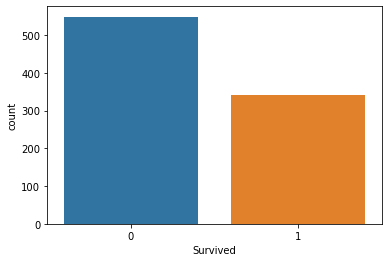

In [4]:
sns.countplot(x='Survived',data=train)

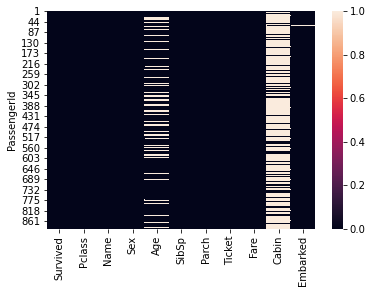

In [5]:
sns.heatmap(train.isnull())

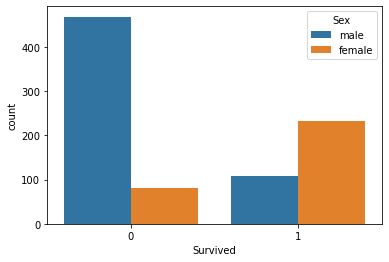

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train)


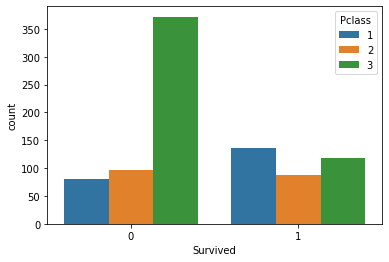

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train)

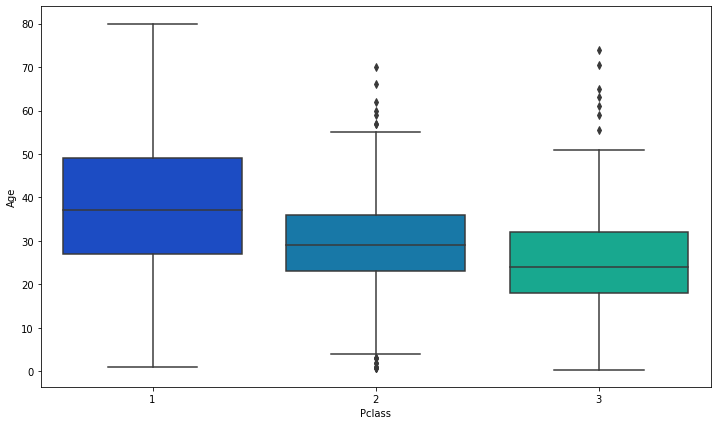

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [10]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

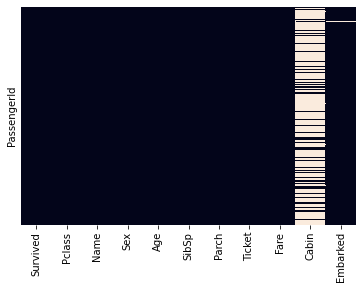

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [12]:
train.drop('Cabin',axis=1,inplace=True)

In [13]:
#simple imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
data['age_mean_imputed']=imputer.fit_transform(data[['Age']])

imputer2=SimpleImputer(strategy='median')
data['age_median_imputed']=imputer2.fit_transform(data[['Age']])

imputer3=SimpleImputer(strategy='most_frequent')
data['Embarked_mod_imputed']=imputer3.fit_transform(data[['Embarked']])


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.6+ KB


In [15]:
train['Embarked'].fillna('S', inplace=True)


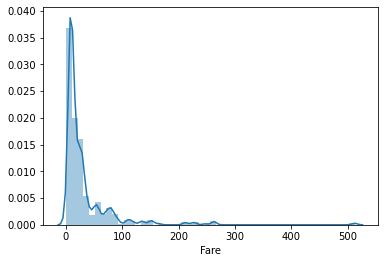

In [29]:
#transformation

fare=data['Fare']
sns.distplot(fare)

In [42]:
from scipy.stats import skew
skew_fare=skew(fare)

0.39426283638993376


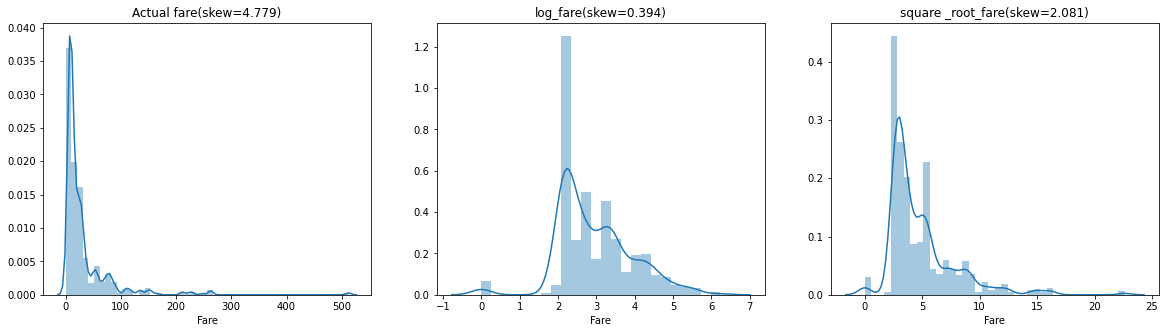

In [52]:
# log transform
log_fare=np.log(fare+1)
skew_log=skew(log_fare)
print(skew_log)
#square fare
sqrt_fare=np.sqrt(fare)
skew_sqr=skew(sqrt_fare)
fig, ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(fare,ax=ax[0])
#ax[0].set_title("actual_fare")
ax[0].set_title("Actual fare(skew=%.3f)"%skew_fare)
sns.distplot(log_fare,ax=ax[1])
ax[1].set_title("log_fare(skew=%.3f)"%skew_log)

sns.distplot(sqrt_fare,ax=ax[2])
ax[2].set_title("square _root_fare(skew=%.3f)"%skew_sqr)

plt.show()


Text(0.5, 1.0, 'Scaled_fare(skew=4.779)')

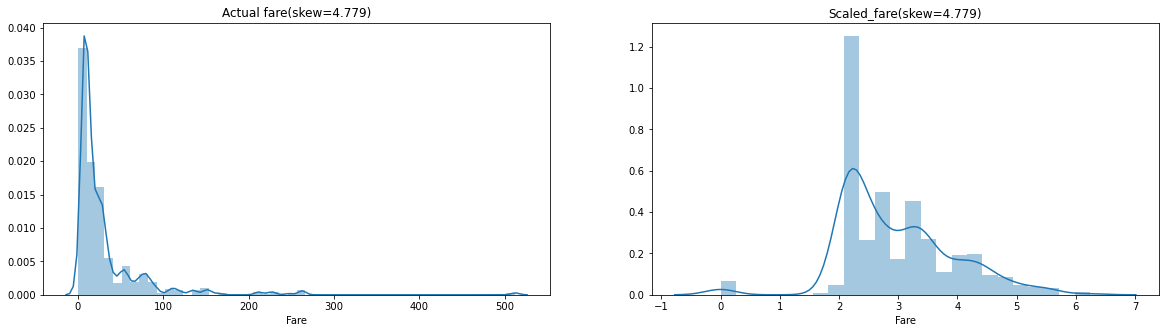

In [60]:
# MinMax_transform
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_fare=scaler.fit_transform(data[['Fare']])
skew_scaled=skew(scaled_fare)
fig, ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(fare,ax=ax[0])
ax[0].set_title("Actual fare(skew=%.3f)"%skew_fare)

sns.distplot(log_fare,ax=ax[1])
ax[1].set_title("Scaled_fare(skew=%.3f)"%skew_scaled)


In [61]:
#quantile transformation
from sklearn.preprocessing import QuantileTransformer




In [16]:
#Dummy Variables
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
print(sex)

             male
PassengerId      
1               1
2               0
3               0
4               0
5               1
...           ...
887             1
888             0
889             0
890             1
891             1

[891 rows x 1 columns]


In [17]:
#Lable Encoding
print(train['Sex'])
# Import label encoder 
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
sex_l= label_encoder.fit_transform(train['Sex'])
print(sex_l)

print(train['Embarked'])
label_encoder_Em = preprocessing.LabelEncoder()
embark_l = label_encoder_Em.fit_transform(train['Embarked'])

print(embark_l)



PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object
[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1

In [18]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse=False,drop='first')
sex_embarked_oh=onehot_encoder_sex.fit_transform(train[['Sex','Embarked']])
sex_embarked_oh2=pd.DataFrame(sex_embarked_oh,columns=['male_oh','Q_oh','S_oh'])
With_oh=pd.concat([train,sex_embarked_oh2],axis=1)


In [19]:
# Target Encoding
from category_encoders import TargetEncoder
encoder_target=TargetEncoder()

sex_target_survived=encoder_target.fit_transform(train['Sex'],train['Survived'])

encoder_target2=TargetEncoder()
em_target_survived=encoder_target2.fit_transform(train['Embarked'],train['Survived'])


In [20]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train2=train.copy()

In [21]:
train = pd.concat([train,sex,embark],axis=1)
train2 = pd.concat([train2,sex_target_survived,em_target_survived],axis=1)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0.188908,0.339009
2,1,1,38.0,1,0,71.2833,0.742038,0.553571
3,1,3,26.0,0,0,7.9250,0.742038,0.339009
4,1,1,35.0,1,0,53.1000,0.742038,0.339009
5,0,3,35.0,0,0,8.0500,0.188908,0.339009


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30,
                                                    random_state=101)
X_train2, X_test2, y_train2, y_test2 =train_test_split(train2.drop('Survived',axis=1),train2['Survived'], test_size=0.30,
                                                    random_state=101)

X_train


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
521,1,30.0,0,0,93.5000,0,0,1
511,3,29.0,0,0,7.7500,1,1,0
447,2,13.0,0,1,19.5000,0,0,1
3,3,26.0,0,0,7.9250,0,0,1
692,3,4.0,0,1,13.4167,0,0,0
...,...,...,...,...,...,...,...,...
576,3,19.0,0,0,14.5000,1,0,1
839,3,32.0,0,0,56.4958,1,0,1
338,1,41.0,0,0,134.5000,0,0,0


In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg')
logmodel2 = LogisticRegression(solver='newton-cg')
logmodel.fit(X_train,y_train)
logmodel2.fit(X_train2,y_train2)
predictions = logmodel.predict(X_test)
predictions2 = logmodel2.predict(X_test2)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [26]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

